## CS 5180 Reinforcement Learning and Sequential Decision Making
### Exercise 4: Monte Carlo Methods

In [ ]:
%load_ext autoreload
%autoreload 2
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
import algorithms
from matplotlib import cm
import plots
import environment

### Blackjack Actions

In [2]:
class Actions(Enum):
    STICK = 0
    HIT   = 1

### Creating the environment and the policy

In [14]:
env = gym.make('Blackjack-v1', sab=True, render_mode='rgb_array')
state_space_shape  = (22, 11, 2)
state_space = [(x, y, z) for x in range(state_space_shape[0])
                         for y in range(state_space_shape[1])
                         for z in range(state_space_shape[2])]
action_space = [Actions.STICK.value, Actions.HIT.value]
policy_space = np.zeros(state_space_shape, dtype=int)

In [15]:
hit_until_20_policy = np.ndarray.copy(policy_space)
hit_until_20_policy[:20,:,:] = Actions.HIT.value

### Q3 (a) Reproducing Figure 5.1

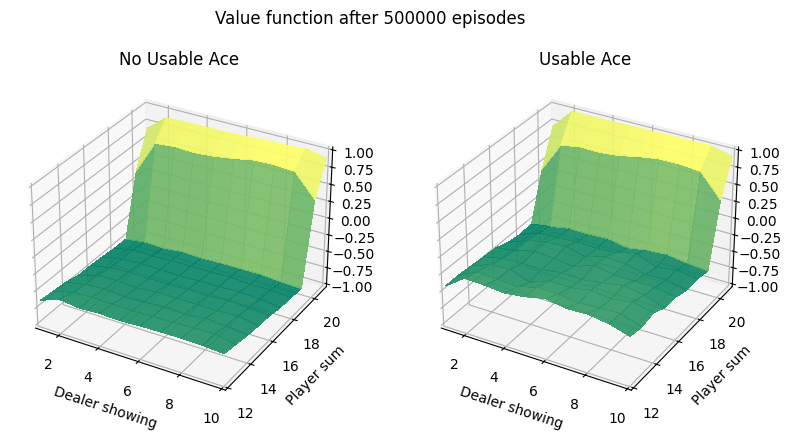

In [16]:
gamma = 1
num_episodes = 500000
value_function = algorithms.mc_first_visit(env, state_space, state_space_shape, action_space, hit_until_20_policy, gamma, num_episodes)
plots.plot_value_function(value_function, f"Value function after {num_episodes} episodes")

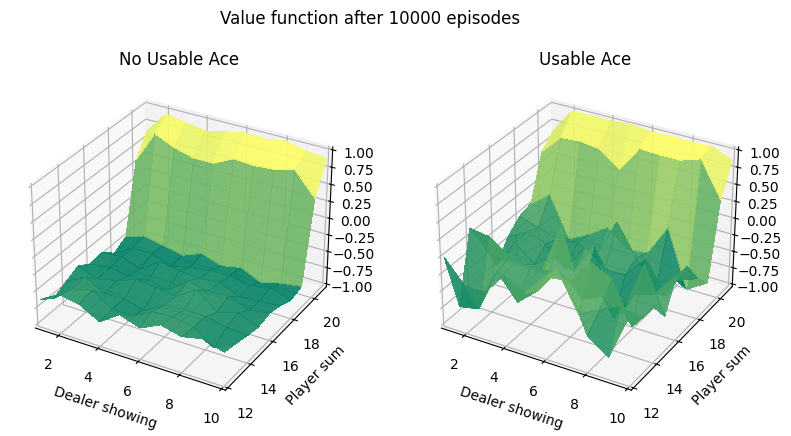

In [28]:
gamma = 1
num_episodes = 10000
value_function = algorithms.mc_first_visit(env, state_space, state_space_shape, action_space, hit_until_20_policy, gamma, num_episodes)
plots.plot_value_function(value_function, f"Value function after {num_episodes} episodes")

### Q3 (b) Reproducing Figure 5.2

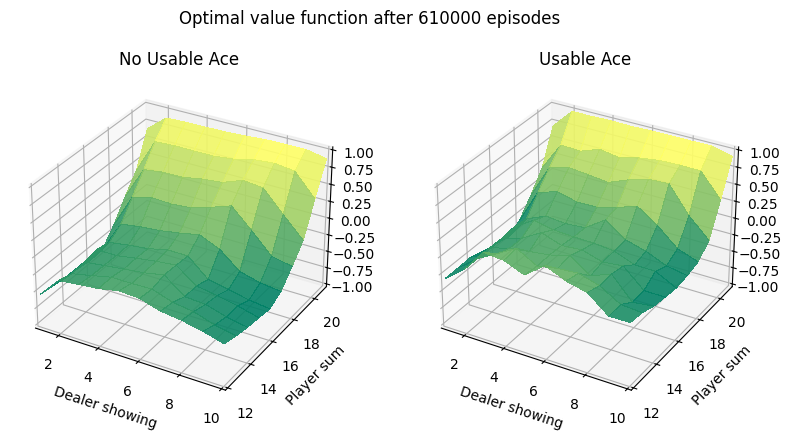

In [26]:
gamma = 1
num_episodes = 610000
op_value_function, optimal_policy = algorithms.mc_exploring_start(env, state_space, state_space_shape, action_space, hit_until_20_policy, gamma, num_episodes)

plots.plot_value_function(op_value_function, f"Optimal value function after {num_episodes} episodes")

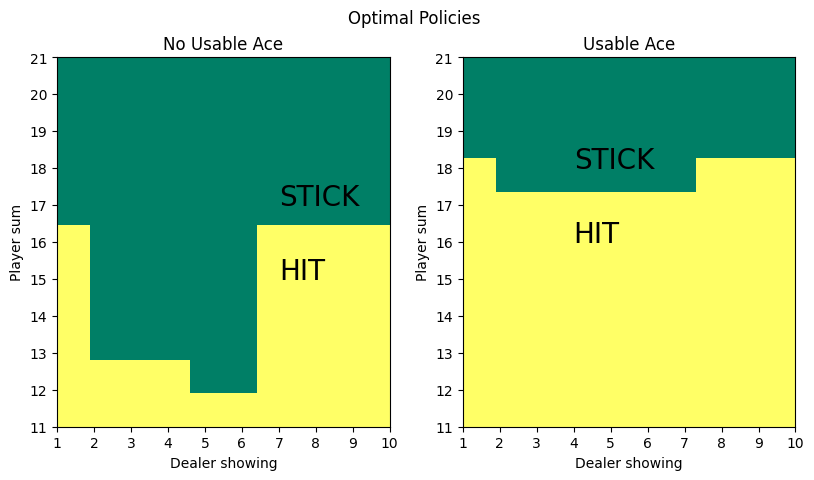

In [27]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(optimal_policy[11:,1:,0], origin="lower", extent=[1,10,11,21], cmap=cm.summer)
ax.set_xlabel("Dealer showing")
ax.set_ylabel("Player sum")
ax.set_title("No Usable Ace")
ax.set_xticks(range(1, 11))
ax.set_yticks(range(11, 22))
ax.text(7, 17, "STICK", fontsize=20, )
ax.text(7, 15, "HIT", fontsize=20)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(optimal_policy[11:,1:,1], origin="lower", extent=[1,10,11,21], cmap=cm.summer)
ax.set_xlabel("Dealer showing")
ax.set_ylabel("Player sum")
ax.set_title("Usable Ace")
ax.set_xticks(range(1, 11))
ax.set_yticks(range(11, 22))
ax.text(4, 18, "STICK", fontsize=20, )
ax.text(4, 16, "HIT", fontsize=20)

fig.suptitle("Optimal Policies")
plt.show()

### Four Rooms Environment

In [74]:
four_rooms = environment.FourRooms()
random_policy = {s:[0.25, 0.25, 0.25, 0.25] for s in four_rooms.state_space}

### Q 4 (a,b) E-soft MC Control

In [ ]:
gamma = 0.99
num_episodes = 10000
num_trials = 10
eps = [0.0, 0.01, 0.1]
returns_e = np.zeros([num_trials, num_episodes, len(eps)])
for idx, e in enumerate(eps):
        optimal_policy, returns = algorithms.mc_e_soft(four_rooms, random_policy, gamma, num_episodes, num_trials, e)
        returns_e[:,:,idx] = returns

np.save("returns_e", returns_e)

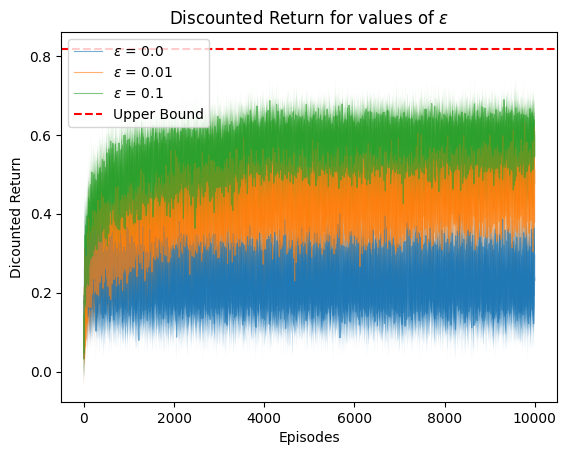

In [78]:
avg_returns_e = np.mean(returns_e, axis=0)
sd_avg_returns_e = np.std(returns_e, axis=0)
std_error_avg_returns = sd_avg_returns_e/np.sqrt(num_trials)

min_steps = 20
upper_bound = gamma**(min_steps)

for idx, e in enumerate(eps):
    plt.plot(avg_returns_e[:,idx], label=f"$\epsilon$ = {e}", alpha = 0.6, linewidth = 0.8)
    plt.fill_between(np.linspace(1, num_episodes, num=num_episodes), 
                     avg_returns_e[:,idx] + 1.96*std_error_avg_returns[:,idx],
                     avg_returns_e[:,idx] - 1.96*std_error_avg_returns[:,idx])

plt.axhline(y = upper_bound, linestyle = "--", color = "r", label = "Upper Bound")
plt.xlabel("Episodes")
plt.ylabel("Dicounted Return")
plt.title("Discounted Return for values of $\epsilon$")
plt.legend()
plt.show()

### Q4 (c) Written

when $\epsilon=0$, we can clearly see that average discounted return over 10 trials is only about 0.2. This is because the agent spends no time exploring and just takes the greedy action. One way to mitigate this issue was to use exploring starts, but here instead we use a $\epsilon$-soft policy which assigns a high probability to a greedy action, and a small non-zero probability to all other actions. This ensures that the agent explores as well. This can be seen in the plots above where $\epsilon=0.01$ and $\epsilon=0.1$ have an average discounted return of about 0.4 and 0.6 respectively.